# Data Mining Exercise:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np
from sklearn import metrics
import seaborn as sns
from IPython.display import set_matplotlib_formats
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import binarize

C:\Users\alter\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
%matplotlib inline
df = pd.read_csv('dataset.csv')

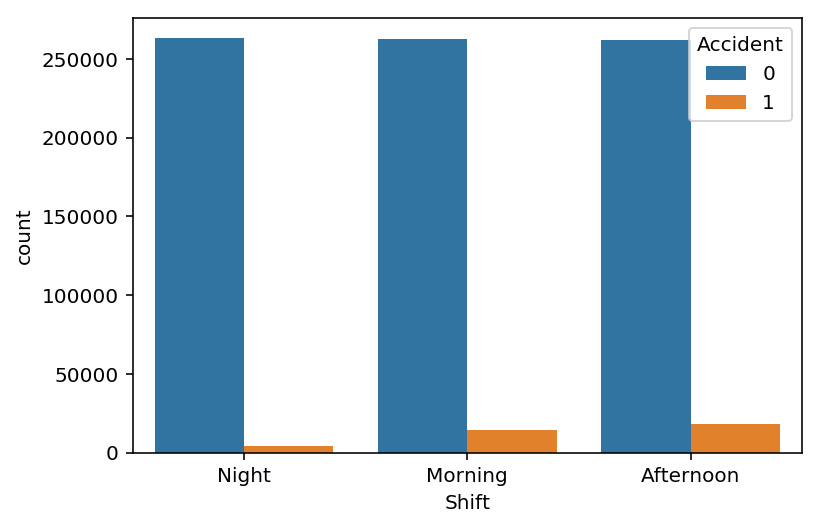

In [3]:
set_matplotlib_formats('retina')
sns.countplot(x="Shift", data=df, hue='Accident')

In [4]:
df = df.sort_values(by = 'date')

In [5]:
df.reset_index(drop = True, inplace = True)

In [6]:
df['Weekday'] = df['date']
df['Month'] = df['date']
df['Year'] = df['date']

In [7]:
df['Weekday'] = pd.to_datetime(df.Weekday)
df['Weekday'] = df['Weekday'].dt.weekday_name
df['Weekday'] = df['Weekday'].replace({"Monday":0,"Tuesday":1,"Wednesday":2,"Thursday":3,"Friday":4,"Saturday":5,"Sunday":6})
df['Month'] = pd.to_datetime(df.Month)
df['Month'] = df['Month'].dt.month
df['Year'] = pd.to_datetime(df.Year)
df['Year'] = df['Year'].dt.year
#3 Drop de variable original
df = df.drop("date",1)
df.head()

,GridID,Shift,Accident,Longitude.grid,Latitude.grid,Weekday,Month,Year
0,1078,Afternoon,0,2.1800,41.4575,4,1,2010
1,406,Morning,0,2.1375,41.3475,4,1,2010
2,932,Morning,0,2.1700,41.4575,4,1,2010
3,454,Morning,0,2.1400,41.3675,4,1,2010
4,1007,Afternoon,0,2.1750,41.4625,4,1,2010


In [8]:
df.shape

(824587, 8)

In [9]:
df['Weekday'] = df['Weekday'].replace({0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})
df['Month'] = df['Month'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
df.head()

,GridID,Shift,Accident,Longitude.grid,Latitude.grid,Weekday,Month,Year
0,1078,Afternoon,0,2.1800,41.4575,Friday,January,2010
1,406,Morning,0,2.1375,41.3475,Friday,January,2010
2,932,Morning,0,2.1700,41.4575,Friday,January,2010
3,454,Morning,0,2.1400,41.3675,Friday,January,2010
4,1007,Afternoon,0,2.1750,41.4625,Friday,January,2010


In [10]:
df.isnull().values.any()  # NaN

False

In [11]:
df.duplicated().sum()

124036

In [12]:
df.dtypes

GridID              int64
Shift              object
Accident            int64
Longitude.grid    float64
Latitude.grid     float64
Weekday            object
Month              object
Year                int64
dtype: object

In [13]:
df['Accident'].value_counts() 

0    788070
1     36517
Name: Accident, dtype: int64

In [14]:
#1 Dummies
dWeekday = pd.get_dummies(df["Weekday"])
dWeekday.shape
#1 Dummies
dMonth = pd.get_dummies(df["Month"])
dMonth.shape
#1 Dummies
dYear = pd.get_dummies(df["Year"])
dYear.shape
#1 Dummies
dShift = pd.get_dummies(df["Shift"])
dShift.shape

#2 Concat
df = pd.concat([df, dWeekday], axis = 1)
#2 Concat
df = pd.concat([df, dMonth], axis = 1)
#2 Concat
df = pd.concat([df, dYear], axis = 1)
#2 Concat
df = pd.concat([df,dShift], axis = 1)

#3 Drop de variable original
df = df.drop("Weekday", 1)
#3 Drop de variable original
df = df.drop("Month", 1)
#3 Drop de variable original
df = df.drop("Year", 1)
#3 Drop de variable original
df = df.drop("Shift",1)
df.head()

,GridID,Accident,Longitude.grid,Latitude.grid,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,...,October,September,2010,2011,2012,2013,2014,Afternoon,Morning,Night
0,1078,0,2.1800,41.4575,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,406,0,2.1375,41.3475,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,932,0,2.1700,41.4575,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,454,0,2.1400,41.3675,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1007,0,2.1750,41.4625,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [15]:
Sample = resample(df, n_samples=10000, random_state=1)

In [16]:
X = Sample.drop('Accident',1)

In [17]:
y = Sample['Accident']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=15)

C:\Users\alter\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Logistic Regression:

In [19]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [20]:
print("Accuracy - Datos de entrenamiento: {}\n Accuracy - Datos de test: {}"
      .format(accuracy_score(y_train, y_train_pred),accuracy_score(y_test, y_test_pred)))

Accuracy - Datos de entrenamiento: 0.9572857142857143
 Accuracy - Datos de test: 0.9566666666666667


In [21]:
print(np.unique(y_train_pred)) 

[0]


In [22]:
y_train_pred = LR.predict_proba(X_train)
y_test_pred = LR.predict_proba(X_test)

In [23]:
print("Árbol de decisión - Datos de entrenamiento: {}\n Árbol de decisión - Datos de test: {}"
      .format(roc_auc_score(y_train,y_train_pred[:,1]),roc_auc_score(y_test,y_test_pred[:,1])))

Árbol de decisión - Datos de entrenamiento: 0.6698288929072135
 Árbol de decisión - Datos de test: 0.6543044760117932


### K-Nearest-Neighbors (KNN):

In [24]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [25]:
print("Accuracy - Datos de entrenamiento: {}\n Accuracy - Datos de test: {}"
      .format(accuracy_score(y_train, y_train_pred),accuracy_score(y_test, y_test_pred)))

Accuracy - Datos de entrenamiento: 0.9587142857142857
 Accuracy - Datos de test: 0.9546666666666667


In [26]:
print(np.unique(y_train_pred)) 

[0 1]


In [27]:
y_train_pred =knn.predict_proba(X_train)
y_test_pred = knn.predict_proba(X_test)

In [28]:
print("Árbol de decisión - Datos de entrenamiento: {}\n Árbol de decisión - Datos de test: {}"
      .format(roc_auc_score(y_train,y_train_pred[:,1]),roc_auc_score(y_test,y_test_pred[:,1])))

Árbol de decisión - Datos de entrenamiento: 0.951026128481797
 Árbol de decisión - Datos de test: 0.5858348968105066


### Decision Tree Classifier:

In [29]:
DTC = DecisionTreeClassifier(criterion="entropy",random_state=1, max_depth = 5)
DTC.fit(X_train,y_train)
y_train_pred = DTC.predict(X_train)
y_test_pred = DTC.predict(X_test)

In [30]:
print("Accuracy - Datos de entrenamiento: {}\n Accuracy - Datos de test: {}"
      .format(accuracy_score(y_train, y_train_pred),accuracy_score(y_test, y_test_pred)))

Accuracy - Datos de entrenamiento: 0.9572857142857143
 Accuracy - Datos de test: 0.9566666666666667


In [31]:
print(np.unique(y_train_pred))

[0]


In [32]:
y_train_pred = DTC.predict_proba(X_train)
y_test_pred = DTC.predict_proba(X_test)

In [33]:
print("Árbol de decisión - Datos de entrenamiento: {}\n Árbol de decisión - Datos de test: {}"
      .format(roc_auc_score(y_train,y_train_pred[:,1]),roc_auc_score(y_test,y_test_pred[:,1])))

Árbol de decisión - Datos de entrenamiento: 0.7704750301831853
 Árbol de decisión - Datos de test: 0.7154904851246313


### Random Forest:

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [35]:
print("Accuracy - Datos de entrenamiento: {}\n Accuracy - Datos de test: {}"
      .format(accuracy_score(y_train, y_train_pred),accuracy_score(y_test, y_test_pred)))

Accuracy - Datos de entrenamiento: 0.9908571428571429
 Accuracy - Datos de test: 0.9556666666666667


In [36]:
print(np.unique(y_train_pred)) 

[0 1]


In [37]:
y_train_pred = rf.predict_proba(X_train)
y_test_pred = rf.predict_proba(X_test)

In [38]:
print("Árbol de decisión - Datos de entrenamiento: {}\n Árbol de decisión - Datos de test: {}"
      .format(roc_auc_score(y_train,y_train_pred[:,1]),roc_auc_score(y_test,y_test_pred[:,1])))

Árbol de decisión - Datos de entrenamiento: 0.9999742962538912
 Árbol de decisión - Datos de test: 0.6007518091664434


### Support Vector Machine (SVM):

In [39]:
SVM = SVC(probability=True,random_state=1)
SVM.fit(X_train,y_train)
y_train_pred = SVM.predict(X_train)
y_test_pred = SVM.predict(X_test)

In [40]:
print("Accuracy - Datos de entrenamiento: {}\n Accuracy - Datos de test: {}"
      .format(accuracy_score(y_train, y_train_pred),accuracy_score(y_test, y_test_pred)))

Accuracy - Datos de entrenamiento: 0.9572857142857143
 Accuracy - Datos de test: 0.9566666666666667


In [41]:
print(np.unique(y_train_pred)) 

[0]


In [42]:
y_train_pred = SVM.predict_proba(X_train)
y_test_pred = SVM.predict_proba(X_test)

In [43]:
print("Árbol de decisión - Datos de entrenamiento: {}\n Árbol de decisión - Datos de test: {}"
      .format(roc_auc_score(y_train,y_train_pred[:,1]),roc_auc_score(y_test,y_test_pred[:,1])))

Árbol de decisión - Datos de entrenamiento: 0.9997761528130129
 Árbol de decisión - Datos de test: 0.6613588850174216


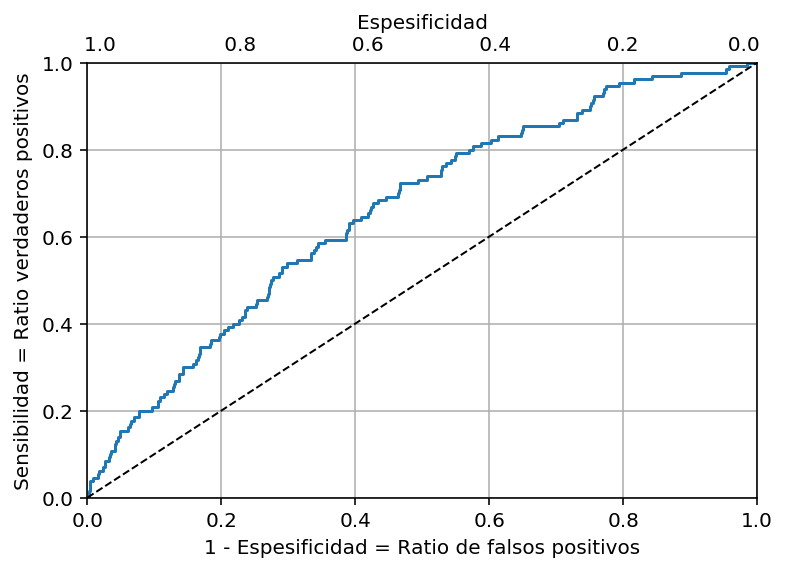

In [44]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%matplotlib inline
rfp, rvp, umbrales = metrics.roc_curve(y_test, y_test_pred[:,1])
plt.plot(rfp, rvp)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Espesificidad\n1.0                 0.8               0.6               0.4               0.2              0.0', 
          fontsize=10)
plt.xlabel('1 - Espesificidad = Ratio de falsos positivos')
plt.ylabel('Sensibilidad = Ratio verdaderos positivos')
plt.grid(True)

## 1. Procesado de los datos:

### Visualizacion:

## 1.1 Balanceado de datos:

In [45]:
X2 = df
X2.shape

(824587, 31)

In [46]:
X2.duplicated().sum()

124036

In [47]:
clase_mayoritaria = X2[X2.Accident == 0]
clase_minoritaria = X2[X2.Accident == 1]

In [48]:
clase_mayoritaria_downsampled = resample(clase_mayoritaria, n_samples=clase_minoritaria.shape[0],
                                         replace = False, random_state=1)

In [49]:
nuevo_dataset = pd.concat([clase_mayoritaria_downsampled, clase_minoritaria])

In [50]:
nuevo_dataset["Accident"].value_counts()

1    36517
0    36517
Name: Accident, dtype: int64

In [51]:
X2 = nuevo_dataset.drop('Accident',1)
y2 = nuevo_dataset['Accident']

In [52]:
X2 = MinMaxScaler().fit_transform(X2)  

In [53]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X2,y2,train_size=0.70,stratify = y2,random_state=10)

C:\Users\alter\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


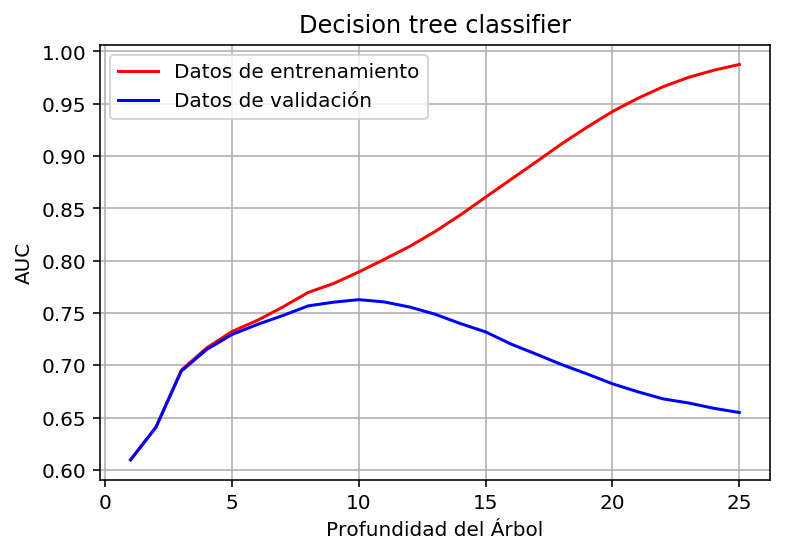

In [54]:
train_scores = []
val_scores = []
max_depth_tree = list(range(1,16,1))

for c in max_depth_tree:
    DTC = DecisionTreeClassifier(max_depth=c,criterion="entropy",random_state=1)
    DTC.fit(X1_train,y1_train)
    y_train_pred = DTC.predict_proba(X1_train)
    train_scores.append(roc_auc_score(y1_train,y_train_pred[:,1]))
    val_scores.append(cross_val_score(DTC,X1_train,y1_train,cv=5,scoring="roc_auc").mean())

plt.plot(max_depth_tree,train_scores,color='r',label='Datos de entrenamiento')
plt.plot(max_depth_tree,val_scores,color='b',label='Datos de validación')
plt.title('Decision tree classifier')
plt.legend()
plt.xlabel('Profundidad del Árbol')
plt.ylabel('AUC')  
plt.grid(True)

In [55]:
print('Train scores: {}\n\nValidación scores: {}\n\nProfundidad del árbol: {}'
      .format(train_scores,val_scores,max_depth_tree))

Train scores: [0.6096527029460779, 0.6408502407141708, 0.6953713676445528, 0.7166436690284291, 0.732309613689663, 0.7429191110926257, 0.7556920597114114, 0.7696088820923113, 0.7781246951573118, 0.7892093075237994, 0.8011873330861691, 0.8135575071194584, 0.8277541836779262, 0.8436588287059954, 0.8606909017358173, 0.8776998354560774, 0.8945685490008559, 0.9117515203570168, 0.9275954482285979, 0.9425381314440794, 0.9551486916666447, 0.9662729939408556, 0.9751747669855917, 0.9820266587619678, 0.9874651426174715]

Validación scores: [0.6096526253157514, 0.6408525567061089, 0.6944706783026705, 0.7150512307530797, 0.7294631222536976, 0.739020196752957, 0.747516010333897, 0.7567652753593357, 0.7602996280161157, 0.7627440684727903, 0.7605314570306646, 0.7557092061014503, 0.7488561005973972, 0.7399098721496233, 0.7318967352314285, 0.7202741056496871, 0.7105707805283805, 0.7006657605187486, 0.691720080771068, 0.682307587370613, 0.6746657968913767, 0.6678792428136072, 0.6639918979976442, 0.6588781

In [56]:
print('Max. Train score: {}\nMax. Validación score: {}\nProfundidad del árbol: {}'
      .format(0.7892093075237994,0.7627440684727903,10))

Max. Train score: 0.7892093075237994
Max. Validación score: 0.7627440684727903
Profundidad del árbol: 10


In [57]:
DTC = DecisionTreeClassifier(criterion="entropy",random_state=7, max_depth = 13)
DTC.fit(X1_train,y1_train)
y_train_pred = DTC.predict(X1_train)
y_test_pred = DTC.predict(X1_test)

In [58]:
print("Accuracy - Datos de entrenamiento: {}\nAccuracy - Datos de test: {}"
      .format(accuracy_score(y1_train, y_train_pred),accuracy_score(y1_test, y_test_pred)))

Accuracy - Datos de entrenamiento: 0.7441464702775659
Accuracy - Datos de test: 0.704029939299895


In [59]:
print(np.unique(y_train_pred)) 

[0 1]


In [60]:
y_train_pred = DTC.predict_proba(X1_train)
y_test_pred = DTC.predict_proba(X1_test)

In [61]:
print("Árbol de decisión - Datos de entrenamiento: {}\nÁrbol de decisión - Datos de test: {}"
      .format(roc_auc_score(y1_train,y_train_pred[:,1]),roc_auc_score(y1_test,y_test_pred[:,1])))

Árbol de decisión - Datos de entrenamiento: 0.8279614036255286
Árbol de decisión - Datos de test: 0.7596146754563169


## 1.3 Feature Importance:

In [62]:
DTC = DecisionTreeClassifier(criterion="entropy",random_state=3, max_depth = 13)
DTC.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

In [63]:
DTC.feature_importances_ 

array([0.23995719, 0.04854322, 0.31174471, 0.00856066, 0.00505851,
       0.02247045, 0.0300125 , 0.00632785, 0.00593788, 0.00733586,
       0.00598985, 0.01195305, 0.00613519, 0.00755662, 0.00757189,
       0.00674996, 0.00788593, 0.00771296, 0.00543663, 0.00657299,
       0.0051644 , 0.00400092, 0.00877792, 0.00889926, 0.00736564,
       0.01050651, 0.01080322, 0.0031403 , 0.00692549, 0.17490245])

In [64]:
model = SelectFromModel(DTC, prefit=True)

In [65]:
X_new_train = model.transform(X1_train)
X_new_test = model.transform(X1_test)
print(X_new_train.shape,X_new_test.shape)

(51123, 4) (21911, 4)


In [66]:
DTC.fit(X_new_train,y1_train)
y_train_pred = DTC.predict(X_new_train)
y_test_pred = DTC.predict(X_new_test)

In [67]:
print("Accuracy - Datos de entrenamiento: {}\nAccuracy - Datos test: {}"
      .format(accuracy_score(y1_train, y_train_pred),accuracy_score(y1_test, y_test_pred)))

Accuracy - Datos de entrenamiento: 0.7231187528118459
Accuracy - Datos test: 0.7057185888366574


In [68]:
y_train_pred_proba = DTC.predict_proba(X_new_train)
y_test_pred_proba = DTC.predict_proba(X_new_test)

In [69]:
print("Datos de entrenamiento - roc_auc: {}\nDatos test - roc_auc: {}"
      .format(roc_auc_score(y1_train,y_train_pred_proba[:,1]),roc_auc_score(y1_test,y_test_pred_proba[:,1])))

Datos de entrenamiento - roc_auc: 0.8026157236296331
Datos test - roc_auc: 0.7810222883984383


### 1.4. AdaBoosClassifier para mejorar el porcentaje de acierto de los errores:

In [70]:
BOOS = AdaBoostClassifier(random_state=1)
BOOS.fit(X1_train,y1_train)
y_train_pred = BOOS.predict(X1_train)
y_test_pred = BOOS.predict(X1_test)

In [71]:
print("Estimación del set de Validacion usando BOOS")
print(cross_val_score(BOOS, X1_train, y1_train, cv=5, scoring='roc_auc').mean())

Estimación del set de Validacion usando BOOS
0.7558509562004934


In [72]:
y_train_pred = BOOS.predict_proba(X1_train)
y_test_pred = BOOS.predict_proba(X1_test)

In [73]:
print("Árbol de decisión - Datos de entrenamiento: {}\n Árbol de decisión - Datos de test: {}"
      .format(roc_auc_score(y1_train,y_train_pred[:,1]),roc_auc_score(y1_test,y_test_pred[:,1])))

Árbol de decisión - Datos de entrenamiento: 0.7573989537848682
 Árbol de decisión - Datos de test: 0.7598408238155726


### 1.5. Haremos que todos los datos del algoritmo balanceado sean el train:

In [104]:
train_scores = []
val_scores = []
max_depth_tree = list(range(1,61,1))
for c in max_depth_tree:
    DTC = DecisionTreeClassifier(max_depth = c,criterion="entropy",random_state=9)
    DTC.fit(X2,y2)
    y_train_pred = DTC.predict_proba(X2)
    train_scores.append(roc_auc_score(y2,y_train_pred[:,1]))
    val_scores.append(cross_val_score(DTC,X2,y2,cv=5,scoring="roc_auc").mean())

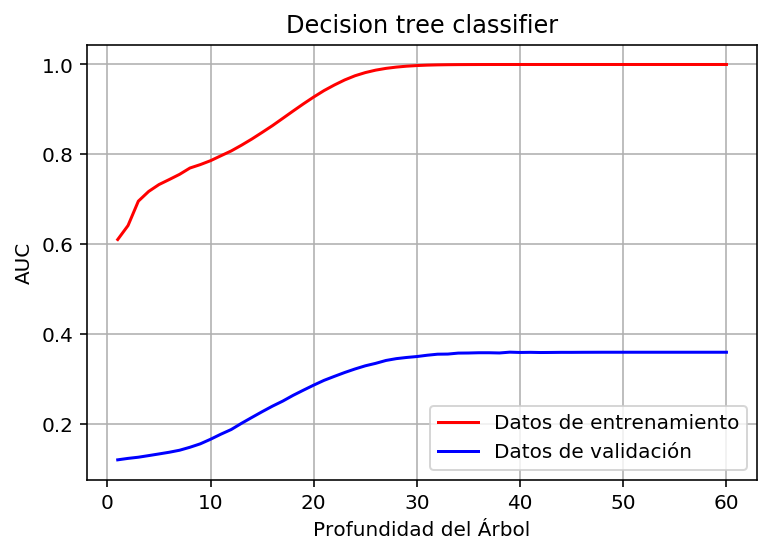

In [105]:
plt.plot(max_depth_tree,train_scores,color='r',label='Datos de entrenamiento')
plt.plot(max_depth_tree,val_scores,color='b',label='Datos de validación')
plt.title('Decision tree classifier')
plt.legend()
plt.xlabel('Profundidad del Árbol')
plt.ylabel('AUC')  
plt.grid(True)

In [76]:
DTC = DecisionTreeClassifier(criterion="entropy",random_state=23, max_depth = 70)
DTC.fit(X2,y2)
y_train_pred = DTC.predict(X2)

In [77]:
print("Accuracy - Datos de entrenamiento:",accuracy_score(y2, y_train_pred))

Accuracy - Datos de entrenamiento: 0.9920721855574116


In [78]:
print(np.unique(y_train_pred)) 

[0 1]


In [79]:
y_train_pred_proba = DTC.predict_proba(X2)

In [80]:
print("Árbol de decisión - Datos de entrenamiento:",roc_auc_score(y2,y_train_pred_proba[:,1]))

Árbol de decisión - Datos de entrenamiento: 0.999874132286139


### 1.6. Probamos mejorar el algoritmo Random Forest una vez balanceados los datos:  
### 1.6.1 Validación de los errores:

In [81]:
error_rate = []
num_trees = []
rf_clf = RandomForestClassifier(warm_start=True, oob_score=True,n_jobs= -1,random_state=10)
for i in range(2,101):
    rf_clf.set_params(n_estimators=i)
    rf_clf.fit(X2,y2)
    oob_error = 1 - rf_clf.oob_score_
    error_rate.append(oob_error)
    num_trees.append(i)

C:\Users\alter\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alter\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\alter\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alter\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\alter\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\alter\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alter\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\alter\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alter\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\alter\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably me

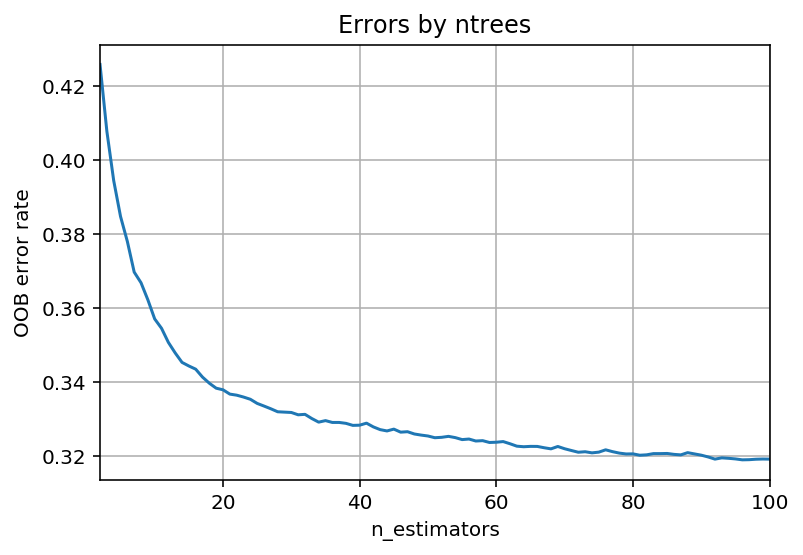

In [82]:
set_matplotlib_formats('retina')
%matplotlib inline
plt.plot(num_trees,error_rate)
plt.title('Errors by ntrees')
plt.xlim(2,100)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.grid(True)

### 1.6.2. Validación del max_depth: 

In [83]:
train_scores = []
test_scores = []
max_depth_tree = list(range(1,60,1))  # Poner mas profundidad.
for c in max_depth_tree:
    rf_clf = RandomForestClassifier(n_jobs= -1,warm_start = True,random_state=12,max_depth=c)
    rf_clf.fit(X1_train,y1_train)
    y_train_pred = rf_clf.predict_proba(X1_train)
    y_test_pred = rf_clf.predict_proba(X1_test)
    train_scores.append(roc_auc_score(y1_train,y_train_pred[:,1]))
    test_scores.append(roc_auc_score(y1_test,y_test_pred[:,1]))

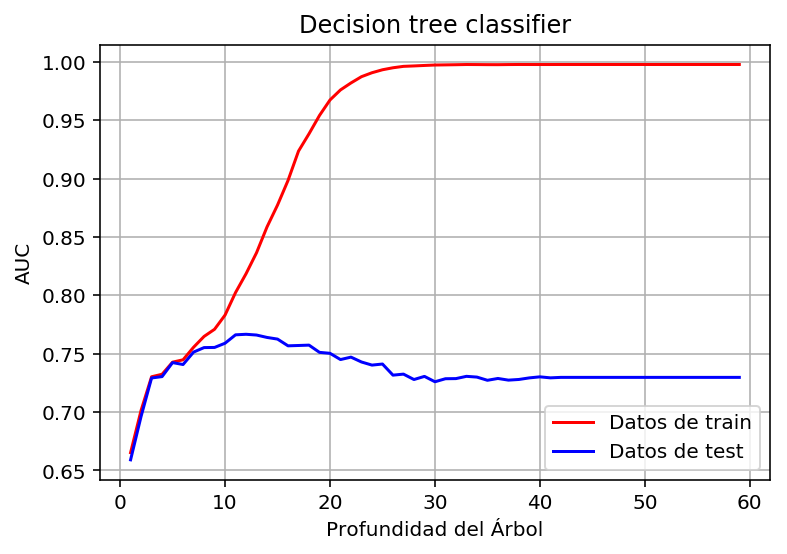

In [84]:
plt.plot(max_depth_tree,train_scores,color='r',label='Datos de train')
plt.plot(max_depth_tree,test_scores,color='b',label='Datos de test')
plt.title('Decision tree classifier')
plt.legend()
plt.xlabel('Profundidad del Árbol')
plt.ylabel('AUC')  
plt.grid(True)

#### La linea del test profundidad máxima de 40, a partir de aquí se produce un sobreajuste en la validación del train.

In [85]:
rf_clf = RandomForestClassifier(n_estimators=60, warm_start=True, oob_score=True,n_jobs= -1,
                                random_state=12,max_depth=11)

In [86]:
rf_clf.fit(X1_train,y1_train)
y_train_pred = rf_clf.predict(X1_train)
y_test_pred = rf_clf.predict(X1_test)

In [87]:
print("Accuracy - Datos entrenamiento: {}\nAccuracy - Datos test: {}"
      .format(accuracy_score(y1_train, y_train_pred),accuracy_score(y1_test, y_test_pred)))

Accuracy - Datos entrenamiento: 0.7341314085636602
Accuracy - Datos test: 0.7032084341198485


In [88]:
y_train_pred_proba = rf_clf.predict_proba(X1_train)
y_test_pred_proba = rf_clf.predict_proba(X1_test)

In [89]:
print("Árbol de decisión - Datos entrenamiento: {}\nÁrbol de decisión - Datos test: {}"
      .format(roc_auc_score(y1_train, y_train_pred_proba[:,1]),roc_auc_score(y1_test, y_test_pred_proba[:,1])))

Árbol de decisión - Datos entrenamiento: 0.8080715386275059
Árbol de decisión - Datos test: 0.7691170015941946


In [90]:
print(np.unique(y_test_pred))

[0 1]


In [91]:
print("Datos test:",recall_score(y1_test,y_test_pred))

Datos test: 0.7439759036144579


In [92]:
print("Matrix confusion - train:\n{}\nMatrix confusion - test:\n{}"
      .format(metrics.confusion_matrix(y1_train, y_train_pred),metrics.confusion_matrix(y1_test, y_test_pred)))

Matrix confusion - train:
[[17457  8105]
 [ 5487 20074]]
Matrix confusion - test:
[[7257 3698]
 [2805 8151]]


In [93]:
print(np.unique(y_test_pred))

[0 1]


# Resultados:

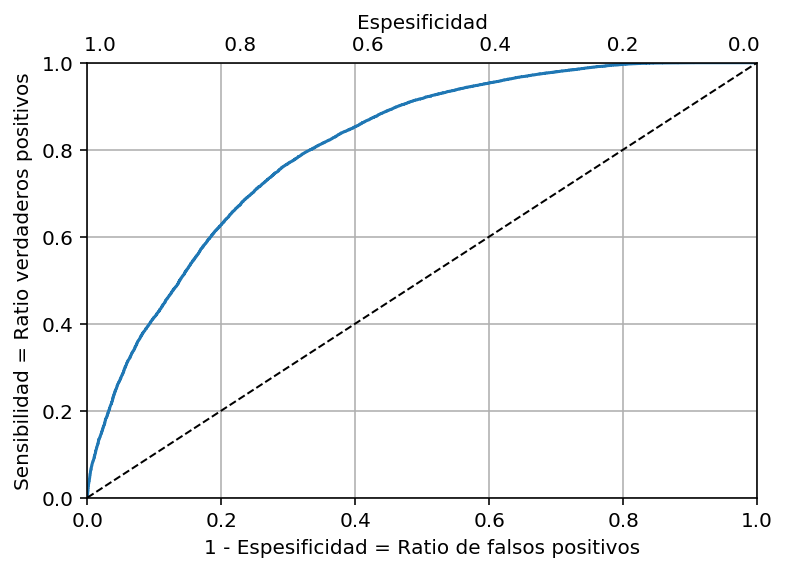

In [94]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%matplotlib inline
rfp, rvp, umbrales = metrics.roc_curve(y1_train, y_train_pred_proba[:,1])
plt.plot(rfp, rvp)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Espesificidad\n1.0                 0.8               0.6               0.4               0.2              0.0', 
          fontsize=10)
plt.xlabel('1 - Espesificidad = Ratio de falsos positivos')
plt.ylabel('Sensibilidad = Ratio verdaderos positivos')
plt.grid(True)

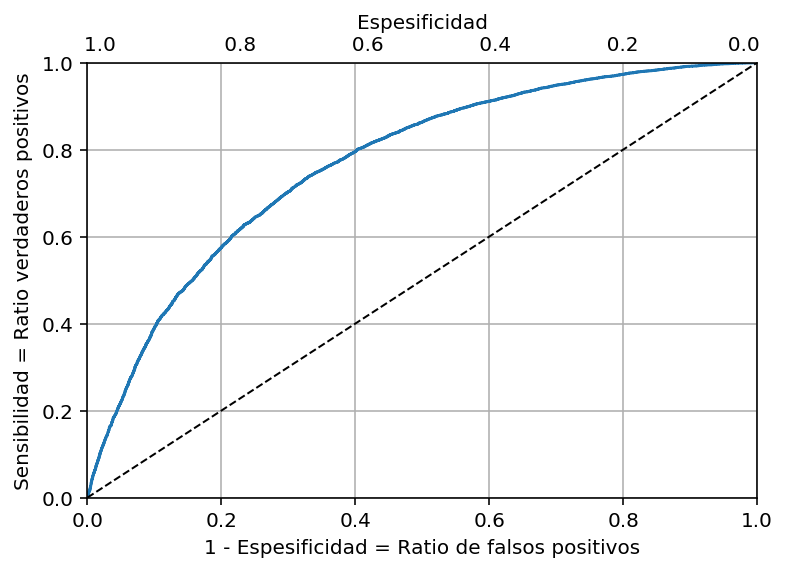

In [95]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%matplotlib inline
rfp, rvp, umbrales = metrics.roc_curve(y1_test, y_test_pred_proba[:,1])
plt.plot(rfp, rvp)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Espesificidad\n1.0                 0.8               0.6               0.4               0.2              0.0', 
          fontsize=10)
plt.xlabel('1 - Espesificidad = Ratio de falsos positivos')
plt.ylabel('Sensibilidad = Ratio verdaderos positivos')
plt.grid(True)